# Mean and standard deviation

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

**Problem 3a.** In this problem we look at the mean and the standard deviation from a more statistical point of view.
 * Generate $N=1\,000$ values $x_1,\ldots,x_n$ from Poisson($\lambda$) distribution for $\lambda=10$. You might want to use the function **poisson(lambda,shape)** from package **numpy.random**.
 * Plot a histogram of these values. What is the mean of Poisson($\lambda$)? What is the standard deviation? Are these values a good description of what you see in the histogram?
 * For $i \in \{1,\ldots,n\}$ compute $\bar{x}_i = \frac{x_1+\ldots+x_i}{i}$. Plot the values of $\bar{x}_i$.
 * On the same figure, plot a horizontal line corresponding to the expected value ($\lambda$) of all those averages.
 * Compute (analitically) the standard deviation $\sigma_i$ of the $i$-th average and plot lines $\lambda \pm \sigma_i$, again on the same figure.
 * Does the standard deviation accurately describe the *typical* deviations?

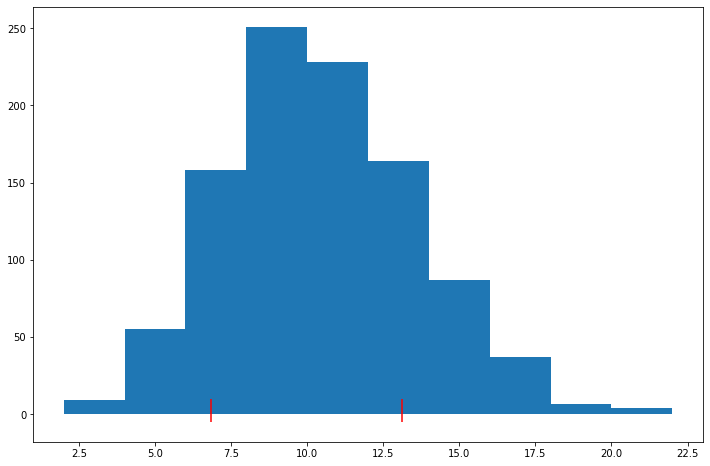

In [19]:
# plot sample histogram along with [mean - std, mean + std] region
def plot_hist(sample, figsize=(12, 8), bins=10):
    mean, std = np.mean(sample), np.std(sample)
    plt.figure(figsize=figsize)
    plt.hist(sample, bins=bins)
    plt.vlines([mean - std, mean + std], -5, 10, colors='red')
    plt.show()


lam = 10
N = 1000
x = np.random.poisson(lam, N)
plot_hist(x, bins=10)


# The mean is 10, and the standard deviation is the square root of 10. The majority of observations seem to be 
# contained in a standard deviation neighourhood of the mean, but not in a much smaller neighbourhood - so, yes,
# mean and standard deviation are a good description of the sample.

# This is due to the fact that Poisson distribution is a unimodal one

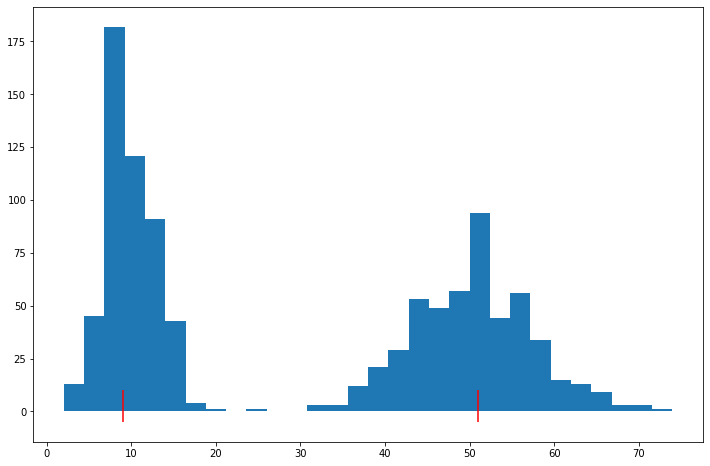

In [20]:
lam = 10
N = 1000
x1 = np.random.poisson(lam, N // 2)
x2 = np.random.poisson(lam * 5, N // 2)
x_bimodal = np.concatenate((x1, x2))
plot_hist(x_bimodal, bins=30)

# Below an example of a bimodal distribution where the mean and standard deviation do not
# provide a good description of the data sample

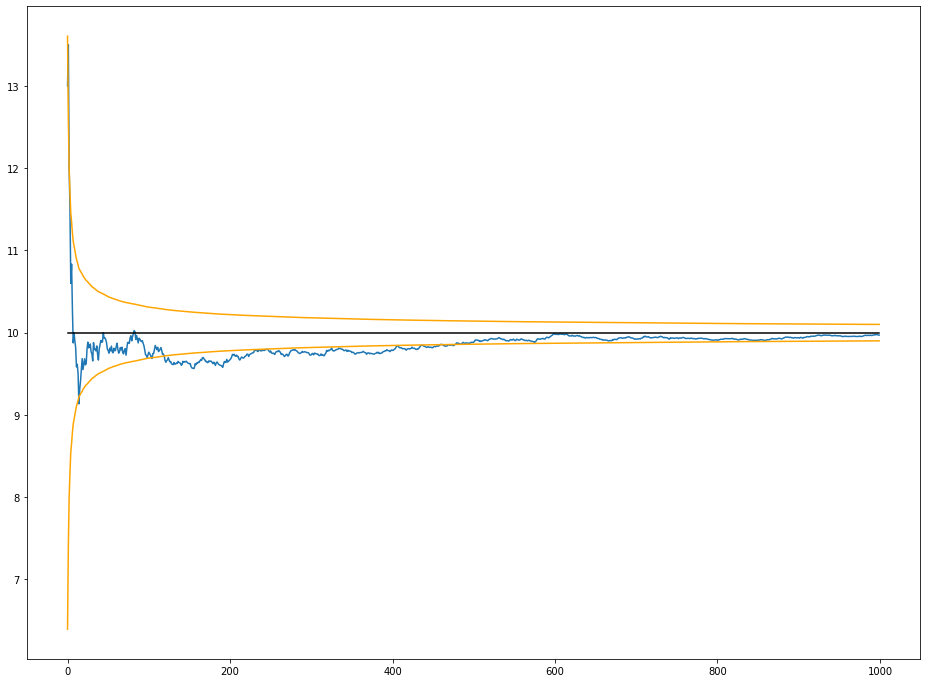

In [22]:
means = np.cumsum(x).astype(np.float32) / np.arange(1, N + 1)  # compute cumulative means
mu = np.repeat(lam, N)

plt.figure(figsize=(16, 12))
plt.plot(means)
plt.plot(mu, c='black')

# standard deviation of the mean of i first observations is sqrt(lam/i), so
sd = np.sqrt(means / np.arange(1, N + 1))
low = mu - sd
high = mu + sd

plt.plot(low, c='orange')
plt.plot(high, c='orange')
plt.show()

# The standard deviation lines seem to be as far away from the mean as the typical deviations, more or less.
# Below plot is a good illustration of the Law of large numbers:
# - weak version tells us that for a given epsilon, sample mean of large enough size N
#   is likely to fall in the interval [mean - epsilon, mean + epsilon], although the opposite
#   can still happen infinitely many times for n >= N
# - strong law tells us that the above will almost surely hold for all n >= N

**Problem 3b.** In this task we consider a discrete distribution *without a mean* and verify whether we can still estimate the location of its peak by simply computing averages. Consider a discrete variable $X$ with the following distribution: $P(X=k) = \frac{1}{4|k|(|k|+1)}$ for $k \neq 0$ and $P(X=0) = \frac{1}{2}$. 
 * Argue that these formulas indeed describe a discrete distribution.
 * Show that $X$ does not have a mean.
 * Plot the function $f(k) = P(X=k)$ for $k \in [-10,10]$.
 * Write a function that samples from $X$'s distribution (imaginary bonus points if it is vectorized).
 * Generate $N=10\,000$ values $x_1,\ldots,x_n$ from the distribution.
 * For $i \in \{1,\ldots,n\}$ compute $\bar{x}_i = \frac{x_1+\ldots+x_i}{i}$. 
 * Plot the values of $\bar{x}_i$. Does it look like the series converges? If it is not clear, you can compute several independent
   $N$-means and plot a histogram, then increase $N$ significantly and see how it changes.
 * For $i \in \{1,\ldots,n\}$ compute $\hat{x}_i = \textrm{ median of }\{x_1,\ldots,x_i\}$. 
   You do not need to do it in a clever way (like in ASD lab).
 * Plot the values of $\hat{x}_i$. Does it look like the series converges? 
 * A more interesting situation would be the one where you a given a distribution like $X+c$ for unknown $c$, and 
   want to figure out what $c$ is, i.e. find the center of the distribution. Both methods above attempt to
   locate the center - which works better?

In [ ]:
# Useful identity: 1/[k(k+1)] = 1/k - 1/(k+1)

**Problem 3c.** We are now going to investigate an intermediate case - a variable with a finite mean, but no variance. Consider a discrete variable $Y$ with the following distribution: $P(Y=k) = \frac{1}{|k|(|k|+1)(|k|+2)}$ for $k \neq 0$ and $P(Y=0) = \frac{1}{2}$. 
 * Argue that these formulas indeed describe a discrete distribution.
 * Show that $EY=0$, but $Y$ has no variation (i.e. the defining series is not absolutely convergent).
 * Plot the function $f(k) = P(Y=k)$ for $k \in [-10,10]$.
 * Write a function that samples from $Y$'s distribution.
 * Generate $N=10\,000$ values $y_1,\ldots,y_n$ from the distribution.
 * For $i \in \{1,\ldots,n\}$ compute $\bar{y}_i = \frac{y_1+\ldots+y_i}{i}$. 
 * Plot the values of $\bar{y}_i$. Does it look like the series converges?
 * For $i \in \{1,\ldots,n\}$ compute $\hat{y}_i = \textrm{ median of }\{y_1,\ldots,y_i\}$.
 * Plot the values of $\hat{y}_i$.
 * Discuss the results obtained.

In [ ]:
# Another useful identity: 2/[k(k+1)(k+2)] = 1/[k(k+1)] - 1/[(k+1)(k+2)]

## Inverse transform sampling

Let us have $X$ - any random variable, $F_X$ - cumulative distribution function and $Q_X$ - quantile function defined as $Q_X(p) = inf\{x: p <= F_X(x)\}$

For $X$ - continuous we have $Q_X = F_X^{-1}$

Now, given $Y \sim Unif[0, 1]$, then

$$Q_X(Y) \sim X$$

The above result can be used to provide an efficient implemention to ex. 3b and 3c

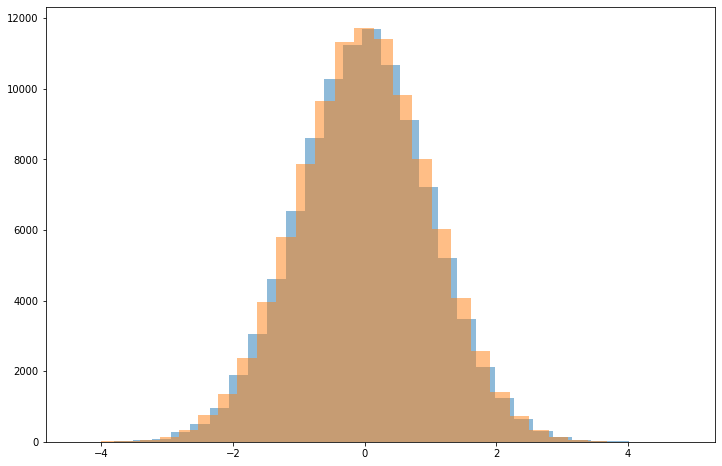

In [24]:
# An example of the above result for the normal distribution
from scipy.stats import norm


def q_norm(p):
    return norm().ppf(p)


def sample_norm(N):
    z = np.random.rand(N)
    return q_norm(z)


x = sample_norm(100000)
y = np.random.normal(size=100000)

plt.figure(figsize=(12, 8))
plt.hist(x, bins=30, alpha=0.5);
plt.hist(y, bins=30, alpha=0.5);